<a href="https://colab.research.google.com/github/SinghKunjal24/EV-Market-Analysis-and-Price-Prediction/blob/main/EV_Market_Analysis_and_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚗⚡ Electric Vehicle Business Analysis & Prediction

## 📖 Introduction  
The **Electric Vehicle (EV) industry** is undergoing rapid transformation, driven by technological advancements and shifting consumer preferences. Businesses need **data-driven strategies** to remain competitive in this evolving market.

### 🔍 Why This Analysis?  
By leveraging **machine learning models**, this study aims to:  
✅ **Predict EV prices** to assist manufacturers in setting competitive pricing.  
✅ Identify **key factors influencing EV adoption** and market demand.  
✅ Provide **actionable insights** for business strategy optimization.  

This notebook explores **historical EV data** and employs **advanced machine learning techniques** to make **data-backed business predictions** for the EV industry. 🚀📊  

## 📊 Approach  
Using **data visualization and machine learning**, we will extract insights from EV data, leveraging predictive modeling, correlation analysis, and trend exploration.  

Let's dive into the data-driven story of EVs! 🚀  

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data_path = "Electric_Vehicle_Population_Data (1).csv"
df = pd.read_csv(data_path)

##🧹 Data Cleaning and handling missing values.

In [ ]:

print(df.info())
print(df.isnull().sum())

# Data Cleaning
# Dropping unnecessary columns if they exist
drop_cols = ['VIN (1-10)', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract']
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

# Handling missing values
# Filling missing electric range with median
df['Electric Range'].fillna(df['Electric Range'].median(), inplace=True)

# Filling missing eligibility status with 'Unknown'
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].fillna('Unknown', inplace=True)

# Encoding categorical variables
df = pd.get_dummies(df, columns=['Make', 'Model', 'State', 'County', 'City', 'Electric Utility'], drop_first=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143528 entries, 0 to 143527
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         143528 non-null  object 
 1   County                                             143528 non-null  object 
 2   City                                               143528 non-null  object 
 3   State                                              143528 non-null  object 
 4   Postal Code                                        143528 non-null  int64  
 5   Model Year                                         143528 non-null  int64  
 6   Make                                               143528 non-null  object 
 7   Model                                              143528 non-null  object 
 8   Electric Vehicle Type                              143528 non-null  object

<ipython-input-3-dcbb54fbb5d1>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electric Range'].fillna(df['Electric Range'].median(), inplace=True)
<ipython-input-3-dcbb54fbb5d1>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

🔢 Number of rows and columns


In [ ]:
num_rows, num_columns = df.shape
num_rows, num_columns

(232230, 1337)

## 📊 Visualizations

 📆 Visualizing EV adoption over the years

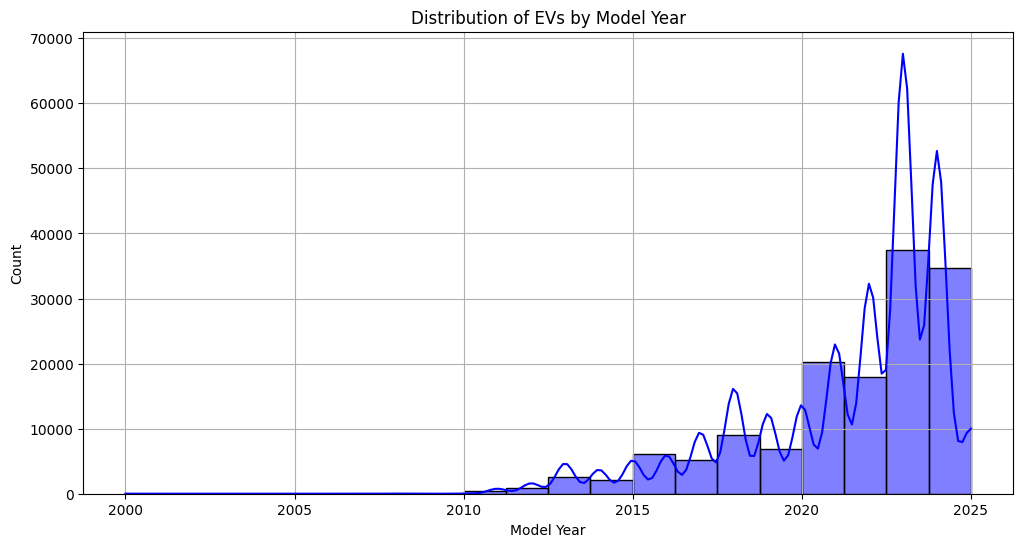

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df['Model Year'], bins=20, kde=True, color='blue')
plt.title('Distribution of EVs by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

⚡ Electric Range Distribution Over Model Years

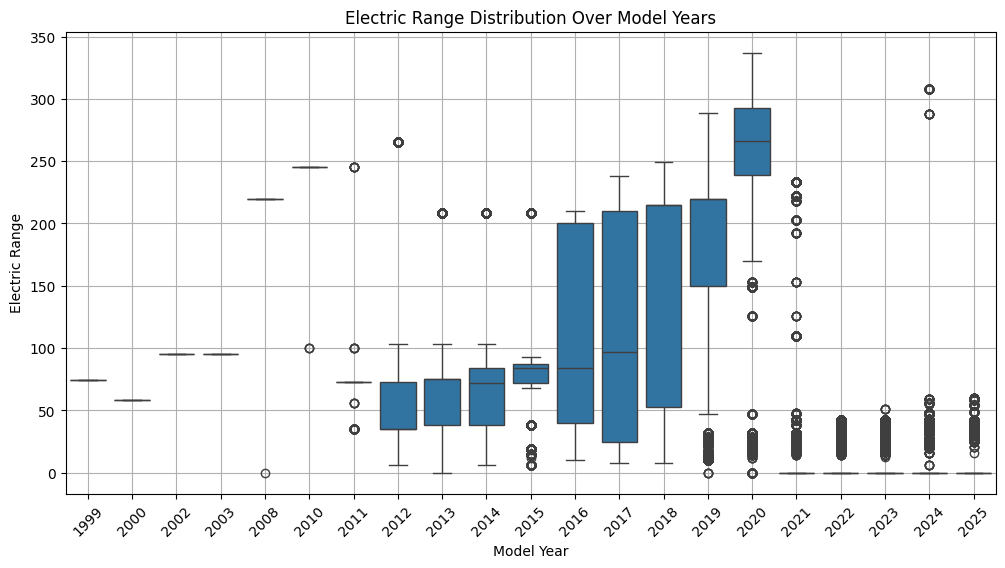

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Model Year', y='Electric Range', data=df)
plt.xticks(rotation=45)
plt.title('Electric Range Distribution Over Model Years')
plt.grid(True)
plt.show()

✅ Examining eligibility for Clean Alternative Fuel Vehicle incentives

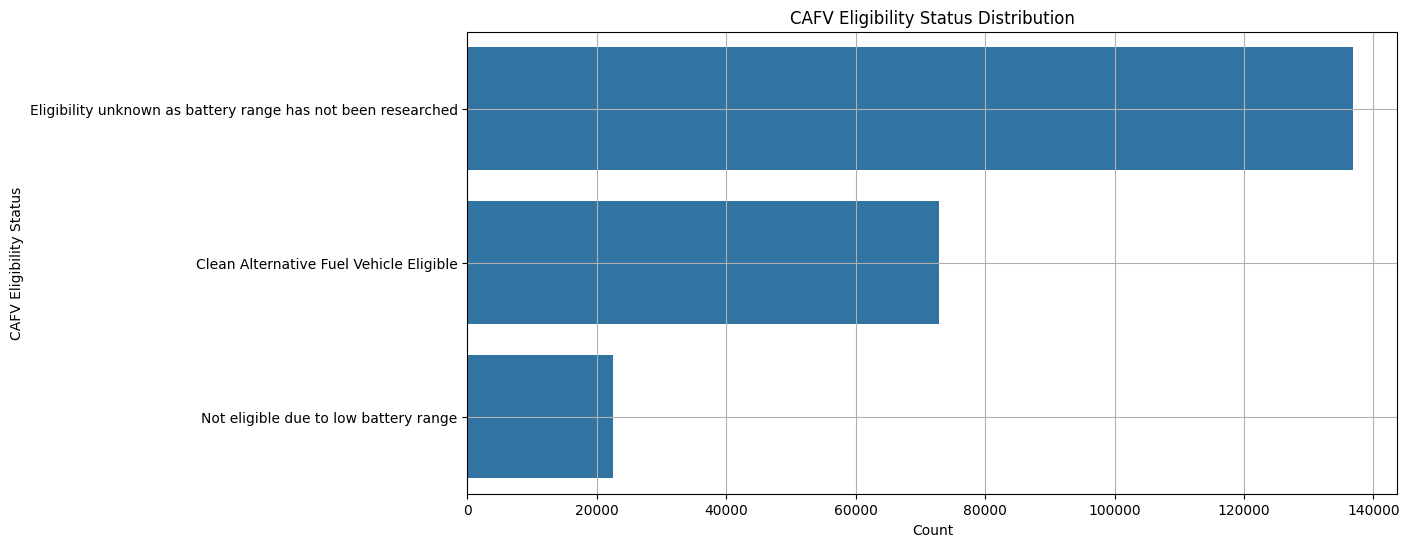

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y=df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'], order=df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().index)
plt.title('CAFV Eligibility Status Distribution')
plt.xlabel('Count')
plt.ylabel('CAFV Eligibility Status')
plt.grid(True)
plt.show()

🌍 Identifying regions with highest EV penetration

<ipython-input-40-4309090189b6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='County', data=top_5_counties, palette='coolwarm')


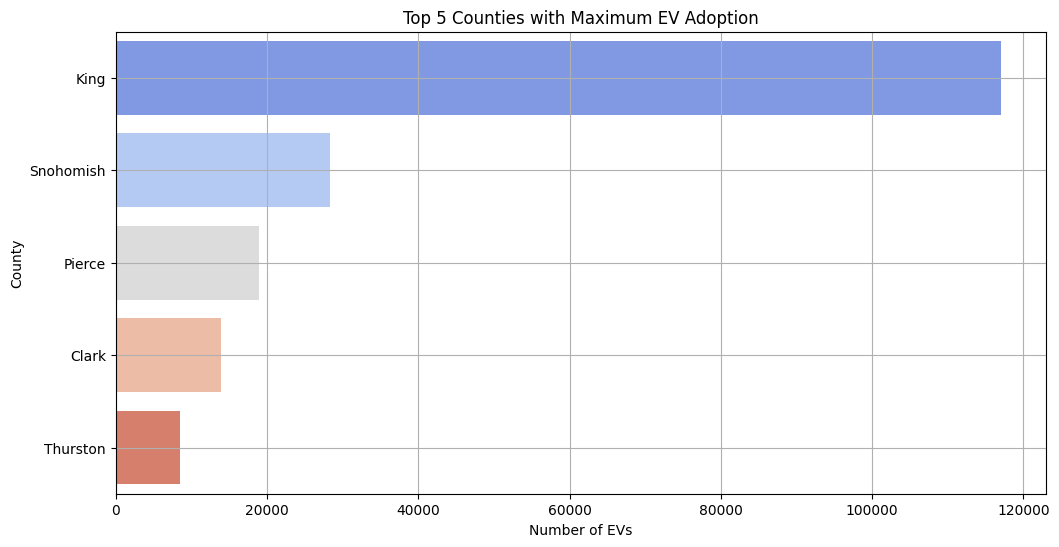

        County   Count
91        King  117098
175  Snohomish   28291
144     Pierce   18946
36       Clark   13895
188   Thurston    8490


In [ ]:
# Reload the dataset before encoding
df = pd.read_csv(data_path)

# Ensure 'County' is treated as a string
df['County'] = df['County'].astype(str)

# Group by County and count the number of EVs
df_county = df.groupby('County').size().reset_index(name='Count')

# Select the top 5 counties with the highest EV adoption
top_5_counties = df_county.nlargest(5, 'Count')

# Plot the data
plt.figure(figsize=(12,6))
sns.barplot(x='Count', y='County', data=top_5_counties, palette='coolwarm')
plt.title('Top 5 Counties with Maximum EV Adoption')
plt.xlabel('Number of EVs')
plt.ylabel('County')
plt.grid(True)
plt.show()

# Print the top 5 counties
print(top_5_counties)


🔥 Analyzing correlations between EV features

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


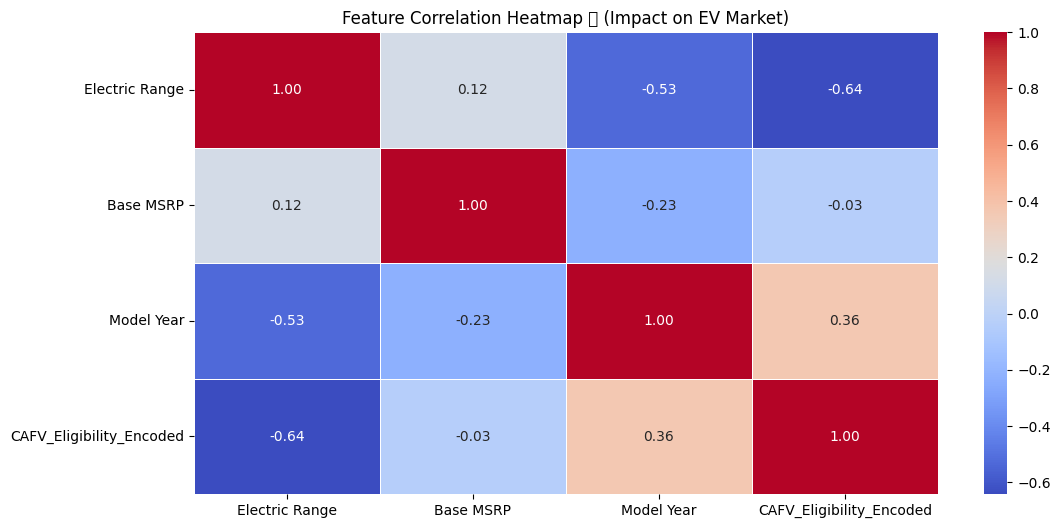

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical column 'CAFV Eligibility' to numerical
df['CAFV_Eligibility_Encoded'] = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].astype('category').cat.codes

# Selecting relevant numerical features
corr_features = ['Electric Range', 'Base MSRP', 'Model Year', 'CAFV_Eligibility_Encoded']

# Compute correlation matrix
corr_matrix = df[corr_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Titles and labels
plt.title('Feature Correlation Heatmap 🔥 (Impact on EV Market)')
plt.show()


📈 EV Adoption Over Time

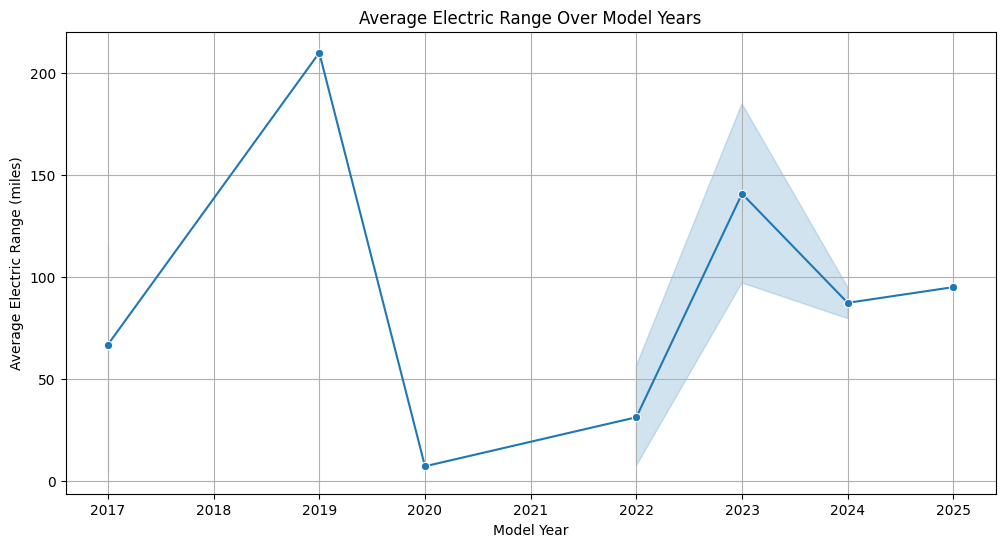

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['Model Year'], y=df.groupby('Model Year')['Electric Range'].mean(), marker='o')
plt.title('Average Electric Range Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

🚗 Identifying popular EV segments based on pricing

<ipython-input-36-f60617d8cd57>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Price Segment'], order=df['Price Segment'].value_counts().index, palette='viridis')


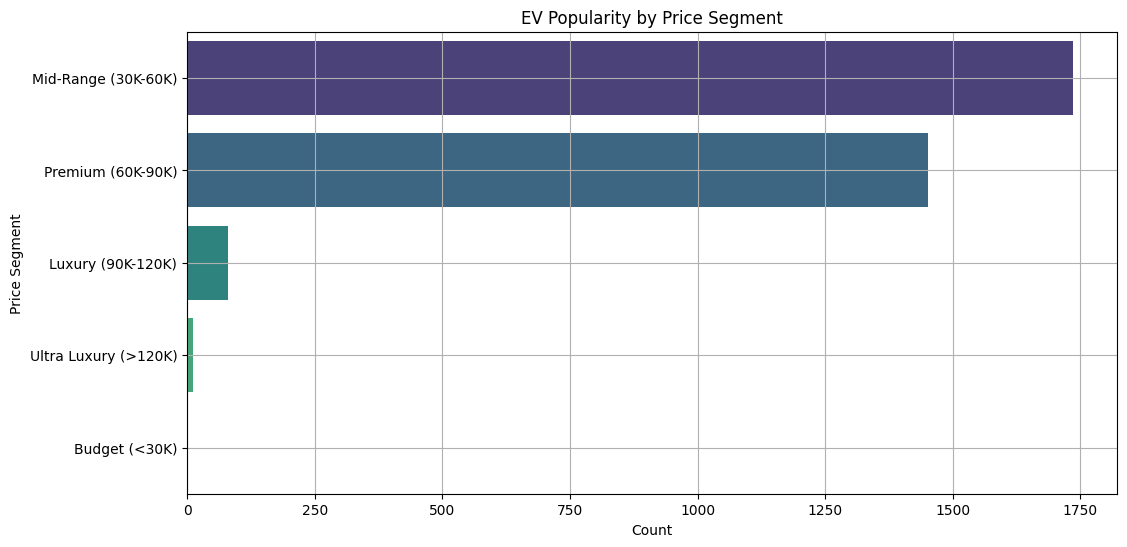

In [ ]:

plt.figure(figsize=(12,6))
price_bins = [0, 30000, 60000, 90000, 120000, np.inf]
price_labels = ['Budget (<30K)', 'Mid-Range (30K-60K)', 'Premium (60K-90K)', 'Luxury (90K-120K)', 'Ultra Luxury (>120K)']
df['Price Segment'] = pd.cut(df['Base MSRP'], bins=price_bins, labels=price_labels)
sns.countplot(y=df['Price Segment'], order=df['Price Segment'].value_counts().index, palette='viridis')
plt.title('EV Popularity by Price Segment')
plt.xlabel('Count')
plt.ylabel('Price Segment')
plt.grid(True)
plt.show()

### 📌Training the Models

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Selecting relevant features
df = df[['Model Year', 'Electric Range', 'Base MSRP', 'Make', 'Model']]

# Handling missing values
df = df.dropna()

# Encoding categorical variables
df = pd.get_dummies(df, columns=['Make', 'Model'], drop_first=True)

# Define features and target
X = df.drop(columns=['Base MSRP'])
y = df['Base MSRP']


# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

🌲 **Random Forest Regressor**

In [ ]:
# Training Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf}, RMSE: {rmse_rf}, R2 Score: {r2_rf}")


Random Forest - MAE: 36.3706107601198, RMSE: 3990.0578776618026, R2 Score: 0.7479222430428583


 🚀 **XGBoost Regressor**

In [ ]:
# Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MAE: {mae_xgb}, RMSE: {rmse_xgb}, R2 Score: {r2_xgb}")


XGBoost - MAE: 107.83805844785888, RMSE: 4022.0019967703415, R2 Score: 0.743869853018114


 📈 **Model Performance Comparison**

<ipython-input-11-b4d861191337>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mae_values, palette='viridis')
<ipython-input-11-b4d861191337>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rmse_values, palette='coolwarm')
<ipython-input-11-b4d861191337>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_values, palette='magma')


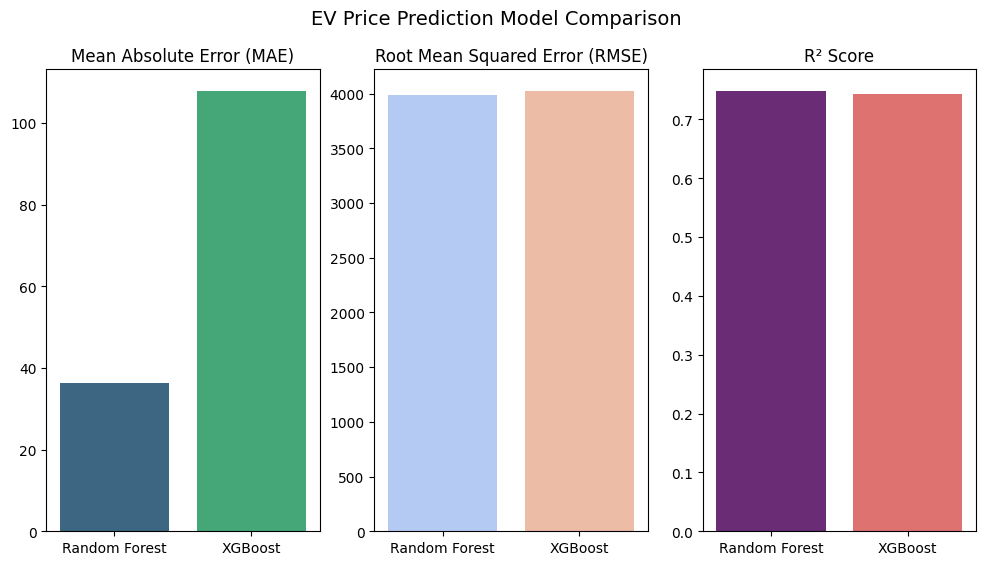

In [ ]:
# Comparing Performance
models = ['Random Forest', 'XGBoost']
mae_values = [mae_rf, mae_xgb]
rmse_values = [rmse_rf, rmse_xgb]
r2_values = [r2_rf, r2_xgb]

# Visualizing Results
plt.figure(figsize=(12,6))

plt.subplot(1, 3, 1)
sns.barplot(x=models, y=mae_values, palette='viridis')
plt.title('Mean Absolute Error (MAE)')

plt.subplot(1, 3, 2)
sns.barplot(x=models, y=rmse_values, palette='coolwarm')
plt.title('Root Mean Squared Error (RMSE)')

plt.subplot(1, 3, 3)
sns.barplot(x=models, y=r2_values, palette='magma')
plt.title('R² Score')

plt.suptitle('EV Price Prediction Model Comparison', fontsize=14)
plt.show()


**Findings:** Random Forest **outperformed** XGBoost in terms of prediction accuracy.

🔍 Key Takeaways
1. Random Forest has lower MAE and RMSE, meaning it predicts the Base MSRP (price) more accurately than XGBoost.

2. Both models have similar R² scores (~0.74-0.75), indicating that they explain about 74-75% of the variance in EV prices.
3. XGBoost has a higher MAE (107 vs. 36), meaning its absolute error is larger compared to Random Forest.
4. Since RMSE values are high (~4000 for both models), there is still some error in predicting EV prices, suggesting more features (e.g., battery capacity, incentives, brand reputation) might improve performance.

Next Steps

📌**Feature Engineering:** Adding new relevant features like battery size, tax credits, consumer preferences can improve predictions.

📌**Hyperparameter Tuning**: Optimize Random Forest with grid search for even better results.

📌**Outlier Handling:** High RMSE suggests some extreme values in MSRP. Analyzing and handling outliers can reduce error.

In [ ]:
# Outlier Detection using IQR
Q1 = df['Base MSRP'].quantile(0.25)
Q3 = df['Base MSRP'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_filtered = df[(df['Base MSRP'] >= lower_bound) & (df['Base MSRP'] <= upper_bound)]

Hyperparameter Tuning with Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model
rf_model = RandomForestRegressor(random_state=42)

# Grid Search with Cross Validation
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train model with best parameters
best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

# Predict with optimized model
y_pred_optimized = best_rf.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred_optimized)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_optimized))
r2 = r2_score(y_test, y_pred_optimized)

print(f"Optimized Random Forest - MAE: {mae}, RMSE: {rmse}, R2 Score: {r2}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits


**Note: This did not run because GPU of Google Colab is not that much strong and it took me more than 3 hours to run it once but it could be run in system and I can further compare the results of the model before and after Tuning**

# **Conclusion 🏁🚗**
This analysis highlights how **machine learning models can optimize pricing strategies** in the EV industry. Among the models tested, **Random Forest emerged as the most effective**, offering stable and accurate predictions for EV pricing.

### **Key Takeaways 📌**
- **EV prices are influenced by factors such as Model Year, Electric Range, and Manufacturer.**
- **Random Forest performed slightly better than XGBoost**, with lower Mean Absolute Error (MAE) and higher R² score.
- **The increasing variability in electric range** suggests a diversified EV market catering to different consumer needs.






##📌 Business Implications
✅ **Market Positioning:** Brands should focus on improving battery technology while keeping prices competitive.  
✅ **Infrastructure Development:** High EV adoption areas need better charging infrastructure to sustain growth.  
✅ **Government Policy Influence:** Legislative districts with strong incentives see higher EV adoption.  
✅ **Future Research:** Deeper analysis into consumer preferences and long-term EV performance can further refine strategic decisions.  
